## 굿스마일 컴퍼니의 피규어로 알아보는 오타쿠 역사

### 목표
- 데이터 전처리 연습하기

### 전제 조건
- '사양(仕様)' 컬럼에 '스케일(スケール)'이라고 명시된 제품만 다룸

### 궁금한 것
- 연도별 장르 변화
- 피규어 가격 변화
- 피규어 추세 변화

### 목차
- 필요한 라이브러리 가져오기
- 데이터 입력하기
- 데이터 전처리
  - 데이터 지우기
  - 데이터 한정하기
  - 데이터 대체하기
  - 데이터 변환하기

### 더 하고 싶은 것
- 카테고리 추가하기
  - 장르(애니, 게임, 코믹스, 캐릭터 등)
  - 작품명 추상화 (시리즈 분류)

#### 필요한 라이브러리 가져오기

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

#### 파일 읽어오기

In [2]:
# import json file to pandas dataframe
df = pd.read_json('product_list_2006_2009.json')
df2 = pd.read_json('product_list_2010_2013.json')
df3 = pd.read_json('product_list_2014_2019.json')
df4 = pd.read_json('product_list_2020_202306.json')
df5 = pd.read_json('product_list_202307.json')
df = pd.concat([df, df2, df3, df4, df5], ignore_index=True)
df.head()

,案内年月,番号,画像,商品名,作品名,メーカー,カテゴリー,価格,発売時期,仕様,...,製品デザイン,衣装制作,ヘッドパーツ原型制作協力,ヘッドパーツ以外の原型制作,初版・再販価格（単品）,デザイン原案,Designer,Illustrator,ザカールポージング監修,資料協力
0,2006/01,000,https://images.goodsmile.info/cgm/images/produ...,ねんどろいど ネコアルク 「換装！ブーブー顔」編 (ねんどろいど ねこあるく 「かんそう！ぶ...,ネコアルク,グッドスマイルカンパニー,ねんどろいど,3143,2006/02,ABS＆PVC塗装済可動フィギュア・ノンスケール・ 全高：約110mm・専用台座付き,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006/01,002,https://images.goodsmile.info/cgm/images/produ...,ねんどろいど へたれ セイバー限定Ver. (ねんどろいど へたれ せいばーげんていVer.),Fate/stay night,グッドスマイルカンパニー,ねんどろいど,3143,2006/07,ABS&PVC 塗装済み可動フィギュア・ノンスケール・全高：約100mm・換装用付替えパーツ付属,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007/11,None,https://images.goodsmile.info/cgm/images/produ...,リボルテックダンボー アマゾンボックスバージョン (りぼるてっくだんぼー あまぞんぼっくすば...,よつばと！,海洋堂,REVOLTECH,2310,2007/12,ABS&PVC 塗装済み可動フィギュア・ノンスケール・全高：約130mm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2007/01,013,https://images.goodsmile.info/cgm/images/produ...,ねんどろいど へたれセイバーオルタ (ねんどろいど へたれせいばーおるた),Fate/stay night,グッドスマイルカンパニー,ねんどろいど,3143,2007/07,ABS&PVC 塗装済み可動フィギュア・ノンスケール・全高：約100mm・換装用付替えパーツ付属,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007/01,006,https://images.goodsmile.info/cgm/images/produ...,ねんどろいど オウカちゃん空中装備完了Ver. (ねんどろいど おうかちゃんくうちゅうそうび...,ニトロウォーズ,グッドスマイルカンパニー,ねんどろいど,4190,2007/02,ABS&PVC 塗装済み可動フィギュア・ノンスケール・全高：約100mm・換装用付替えパーツ付属,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# 作品名의 종류와 개수 확인
df['作品名'].value_counts()

初音ミク GTプロジェクト              291
Fate/Grand Order           201
キャラクター・ボーカル・シリーズ01 初音ミク    181
ねんどろいどどーる                  180
艦隊これくしょん ‐艦これ‐             178
                          ... 
妖怪リスト                        1
アイドルマスター765PRO ALLSTARS      1
CLANNAD                      1
ブレンド・S                       1
「艦これ」いつかあの海で                 1
Name: 作品名, Length: 2289, dtype: int64

#### 데이터 전처리

전처리가 필요한 데이터 확인

In [4]:
# 각 행의 데이터 타입 전체 확인
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11832 entries, 0 to 11831
Columns: 399 entries, 案内年月 to 資料協力
dtypes: object(399)
memory usage: 36.0+ MB


모든 데이터가 object(string) 타입이다. 날짜 혹은 숫자가 필요한 경우 적절하게 변환할 필요가 있다.

분석에 이용할 데이터 중에, NaN 값을 찾아 적절한 값으로 삭제 혹은 대체한다.

In [5]:
# 이미지가 NaN인 행 삭제 (이미지가 없는 행은 그외 모든 데이터가 없는 행이므로 삭제)
df = df.dropna(subset=['画像'])

# 작품명이 NaN인 경우 상품명으로 대체
df['作品名'] = df['作品名'].fillna(df['商品名'])

# 사양이 NaN인 행인 경우 카테고리로 대체
df['仕様'] = df['仕様'].fillna(df['カテゴリー'])

# 가격이 NaN인 경우 0으로 대체
df['価格'] = df['価格'].fillna(0)

# 가격이 빈 문자열인 경우 0으로 대체
df['価格'] = df['価格'].replace('', 0)


데이터 변환 및 추가

In [6]:
# 価格을 계산 가능한 값으로 변환
df['価格'] = df['価格'].astype(float)

In [7]:
# 案内年月의 YYYY/MM 형식을 날짜형식으로 변환
df['案内年月日'] = pd.to_datetime(df['案内年月'], format='%Y/%m')
df['案内年'] = df['案内年月日'].dt.year
df['案内年'].dtype

dtype('int64')

#### 데이터 한정하기
'사양'에 '스케일'가 포함된 데이터만 분석에 사용

In [10]:
figure_df = df[df['仕様'].str.contains('スケール')]
figure_df.head()

,案内年月,番号,画像,商品名,作品名,メーカー,カテゴリー,価格,発売時期,仕様,...,ヘッドパーツ原型制作協力,ヘッドパーツ以外の原型制作,初版・再販価格（単品）,デザイン原案,Designer,Illustrator,ザカールポージング監修,資料協力,案内年月日,案内年
0,2006/01,000,https://images.goodsmile.info/cgm/images/produ...,ねんどろいど ネコアルク 「換装！ブーブー顔」編 (ねんどろいど ねこあるく 「かんそう！ぶ...,ネコアルク,グッドスマイルカンパニー,ねんどろいど,3143.0,2006/02,ABS＆PVC塗装済可動フィギュア・ノンスケール・ 全高：約110mm・専用台座付き,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-01-01,2006
1,2006/01,002,https://images.goodsmile.info/cgm/images/produ...,ねんどろいど へたれ セイバー限定Ver. (ねんどろいど へたれ せいばーげんていVer.),Fate/stay night,グッドスマイルカンパニー,ねんどろいど,3143.0,2006/07,ABS&PVC 塗装済み可動フィギュア・ノンスケール・全高：約100mm・換装用付替えパーツ付属,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-01-01,2006
2,2007/11,None,https://images.goodsmile.info/cgm/images/produ...,リボルテックダンボー アマゾンボックスバージョン (りぼるてっくだんぼー あまぞんぼっくすば...,よつばと！,海洋堂,REVOLTECH,2310.0,2007/12,ABS&PVC 塗装済み可動フィギュア・ノンスケール・全高：約130mm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-11-01,2007
3,2007/01,013,https://images.goodsmile.info/cgm/images/produ...,ねんどろいど へたれセイバーオルタ (ねんどろいど へたれせいばーおるた),Fate/stay night,グッドスマイルカンパニー,ねんどろいど,3143.0,2007/07,ABS&PVC 塗装済み可動フィギュア・ノンスケール・全高：約100mm・換装用付替えパーツ付属,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-01-01,2007
4,2007/01,006,https://images.goodsmile.info/cgm/images/produ...,ねんどろいど オウカちゃん空中装備完了Ver. (ねんどろいど おうかちゃんくうちゅうそうび...,ニトロウォーズ,グッドスマイルカンパニー,ねんどろいど,4190.0,2007/02,ABS&PVC 塗装済み可動フィギュア・ノンスケール・全高：約100mm・換装用付替えパーツ付属,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-01-01,2007


### Fate 시리즈 중 어떤 피규어가 가장 많을까?

In [8]:
# 일본어 폰트 추가
plt.rcParams['font.family'] = 'Meiryo'

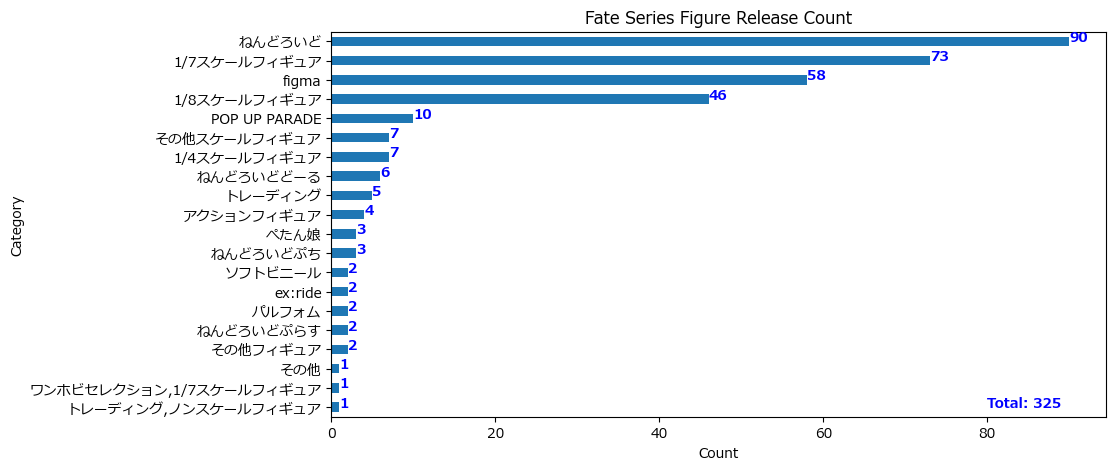

In [10]:
# 作品名에 fate가 포함된 행 검색, 대소문자 구분 없이 검색 후 행 개수 확인
fate_df = figure_df[figure_df['作品名'].str.contains('fate/', case=False)]['カテゴリー'].value_counts().sort_values()
fate_df.plot.barh(figsize=(10, 5))

# 그래프에 숫자 추가
for i, v in enumerate(fate_df.values):
    plt.text(v, i, str(v), color='blue', fontweight='bold')

# 그래프에 표본의 합계 추가
plt.text(80, 0, 'Total: ' + str(fate_df.sum()), color='blue', fontweight='bold')

# 데이터 라벨 추가
plt.title('Fate Series Figure Release Count')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

일본을 휘어잡는 서브컬처 1대장 Fate 시리즈다운 결과이다.<br>
캐릭터의 수가 많은 만큼 출시된 피규어도 많다.

### 하츠네 미쿠는 어떤 피규어가 가장 많을까?

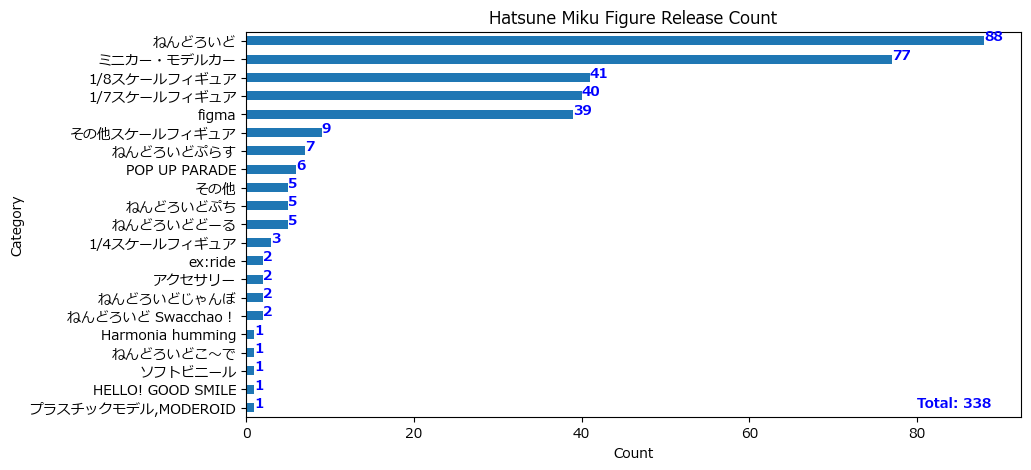

In [11]:
# 作品名에 ミク가 포함된 행 검색
miku_df = figure_df[figure_df['作品名'].str.contains('ミク', case=False)]['カテゴリー'].value_counts().sort_values()
miku_df.plot.barh(figsize=(10, 5))

# 숫자 라벨 추가
for i, v in enumerate(miku_df.values):
    plt.text(v, i, str(v), color='blue', fontweight='bold')

# 그래프에 표본의 합계 추가
plt.text(80, 0, 'Total: ' + str(miku_df.sum()), color='blue', fontweight='bold')

# 제목, x축, y축 라벨 추가
plt.title('Hatsune Miku Figure Release Count')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()


넨도로이드가 1위인 것은 예상된 결과이지만, 2위 데이터가 의외이다.<br>
77개의 제품이 있는 미니카, 모델카(ミニカー・モデルカー)가 무엇인고 하니 이런 물건이다.<br>
레이싱 미쿠의 제품이 많이 전개된다는 것은 알았지만, 이 미니카의 존재는 처음 알았다.

<img src="https://images.goodsmile.info/cgm/images/product/20111020/3322/15880/large/a7ef20d684df80d72ff6f3fe425c5603.jpg" width=400>
<img src="https://images.goodsmile.info/cgm/images/product/20230405/14219/113881/large/711374194a295542767b495d6e39e6f5.jpg" width=400>

다음은 연도별 피규어 가격 평균을 알아보자.

In [12]:
# 연도별 피규어 가격 평균
year_price_df = figure_df.groupby('案内年')['価格'].mean()
year_price_df

案内年
2006    3.143000e+03
2007    4.233200e+03
2008    5.853315e+03
2009    2.025987e+10
2010    5.586562e+03
2011    5.436253e+03
2012    5.911085e+03
2013    2.729687e+05
2014    3.624094e+06
2015    8.280141e+06
2016    7.519125e+32
2017    1.196882e+04
2018    1.661884e+04
2019    1.126237e+04
2020    9.808891e+03
2021    5.396764e+04
2022    1.417709e+04
2023    5.698788e+06
Name: 価格, dtype: float64

2016년의 평균값이 너무 크다. 가격이 이상한 데이터가 하나가 아닐 수 있으므로,<br>
1,000,000이 넘는 가격을 조사해 보자. 피규어의 가격은 보통 100만 엔 이하다.

In [24]:
# 1000000을 넘는 가격을 df에서 검색
df[df['価格'] > 1000000].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 284 to 11758
Columns: 401 entries, 案内年月 to 案内年
dtypes: float64(1), int64(1), object(399)
memory usage: 128.8+ KB


41행이나 검색되었다. 이 정도면 크롤러의 코드를 수정해야 할 것 같다.
일단 이 41행을 제외하고 진행하도록 하자.

In [28]:
# 1000000을 넘는 가격을 figure_price_df에서 제외
figure_price_df = df[(df['価格'] < 1000000) & df['仕様'].str.contains('スケール')]
figure_price_df

,案内年月,番号,画像,商品名,作品名,メーカー,カテゴリー,価格,発売時期,仕様,...,ヘッドパーツ原型制作協力,ヘッドパーツ以外の原型制作,初版・再販価格（単品）,デザイン原案,Designer,Illustrator,ザカールポージング監修,資料協力,案内年月日,案内年
0,2006/01,000,https://images.goodsmile.info/cgm/images/produ...,ねんどろいど ネコアルク 「換装！ブーブー顔」編 (ねんどろいど ねこあるく 「かんそう！ぶ...,ネコアルク,グッドスマイルカンパニー,ねんどろいど,3143.0,2006/02,ABS＆PVC塗装済可動フィギュア・ノンスケール・ 全高：約110mm・専用台座付き,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-01-01 00:00:00,2006
1,2006/01,002,https://images.goodsmile.info/cgm/images/produ...,ねんどろいど へたれ セイバー限定Ver. (ねんどろいど へたれ せいばーげんていVer.),Fate/stay night,グッドスマイルカンパニー,ねんどろいど,3143.0,2006/07,ABS&PVC 塗装済み可動フィギュア・ノンスケール・全高：約100mm・換装用付替えパーツ付属,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-01-01 00:00:00,2006
2,2007/11,None,https://images.goodsmile.info/cgm/images/produ...,リボルテックダンボー アマゾンボックスバージョン (りぼるてっくだんぼー あまぞんぼっくすば...,よつばと！,海洋堂,REVOLTECH,2310.0,2007/12,ABS&PVC 塗装済み可動フィギュア・ノンスケール・全高：約130mm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-11-01 00:00:00,2007
3,2007/01,013,https://images.goodsmile.info/cgm/images/produ...,ねんどろいど へたれセイバーオルタ (ねんどろいど へたれせいばーおるた),Fate/stay night,グッドスマイルカンパニー,ねんどろいど,3143.0,2007/07,ABS&PVC 塗装済み可動フィギュア・ノンスケール・全高：約100mm・換装用付替えパーツ付属,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-01-01 00:00:00,2007
4,2007/01,006,https://images.goodsmile.info/cgm/images/produ...,ねんどろいど オウカちゃん空中装備完了Ver. (ねんどろいど おうかちゃんくうちゅうそうび...,ニトロウォーズ,グッドスマイルカンパニー,ねんどろいど,4190.0,2007/02,ABS&PVC 塗装済み可動フィギュア・ノンスケール・全高：約100mm・換装用付替えパーツ付属,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-01-01 00:00:00,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11824,2023/01,None,https://images.goodsmile.info/cgm/images/produ...,パワー バニーVer.(ぱわー ばにーVer. ),チェンソーマン,FREEing,1/4スケールフィギュア,39600.0,2023/07,プラスチック製塗装済み完成品・専用台座付属・1/4スケール・全高：約505mm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-01 00:00:00,2023
11825,2023/01,None,https:https://images-goodsmile-info.s3-ap-nort...,Statue and ring style 佐野万次郎 (すたちゅー あんど りんぐ すたい...,東京リベンジャーズ,FREEing,1/8スケールフィギュア,33000.0,2023/08,プラスチック製塗装済み完成品・1/8スケール・専用台座付属・全高：約210mmシルバー925...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-01 00:00:00,2023
11827,2023/01,2036,https://images.goodsmile.info/cgm/images/produ...,ねんどろいど ヴォックス・アクマ (ねんどろいど ゔぉっくす・あくま),NIJISANJI EN,グッドスマイルカンパニー,ねんどろいど,7500.0,2023/07,プラスチック製 塗装済み可動フィギュア・ノンスケール・専用台座付属・全高：約100mm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-01 00:00:00,2023
11828,2023/07,NaN,https://images.goodsmile.info/cgm/images/produ...,初音ミクシンフォニー 2022Ver. (はつねみくしんふぉにー 2022Ver.),キャラクター・ボーカル・シリーズ01 初音ミク,グッドスマイルカンパニー,その他スケールフィギュア,30000.0,2024/07,プラスチック製 塗装済み完成品・1/1スケール・専用台座付属・全高：約310mm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-07-01 00:00:00,2023


In [29]:
year_price_df = figure_price_df.groupby('案内年')['価格'].mean()
year_price_df

案内年
2006     3143.000000
2007     4233.200000
2008     5853.314917
2009     5798.653595
2010     5586.562212
2011     5436.252595
2012     5911.084639
2013     7742.007194
2014     9632.196375
2015    11399.220779
2016    11355.725581
2017    11968.820717
2018    10442.142276
2019    11262.374400
2020     9808.891492
2021    12707.502070
2022    14177.087624
2023    13634.585526
Name: 価格, dtype: float64

정상적으로 보이는 값이 나왔다. 그래프를 그려보자.

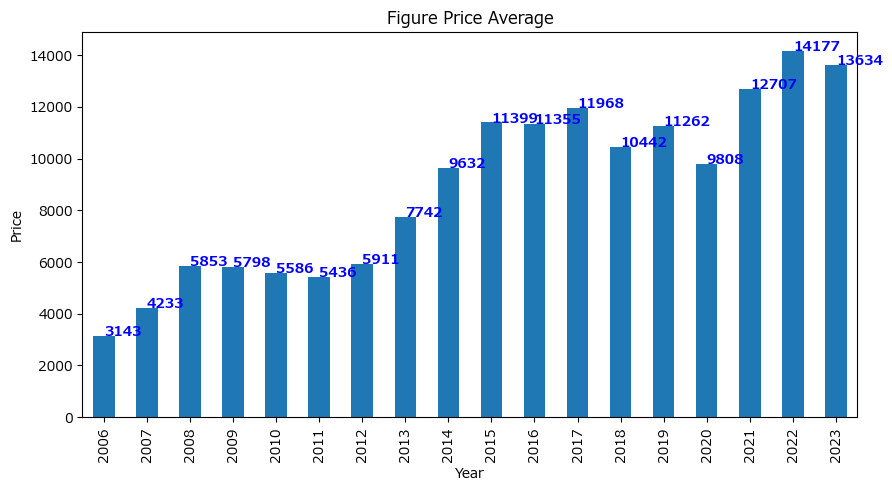

In [42]:
# 연도별 피규어 가격 평균 그래프
year_price_df.plot.bar(figsize=(10, 5))

# 그래프에 숫자 추가
for i, v in enumerate(year_price_df.values):
    plt.text(i, v, str(int(v)), color='blue', fontweight='bold')

# 라벨 추가
plt.title('Figure Price Average')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()


사실 피규어는 종류, 크기에 따라 가격도 다르다. 종류에 따라 가격 분석을 따로 해야한다.

In [65]:
# 카테고리 목록과 개수 확인
df['カテゴリー'].value_counts()

ねんどろいど                    2291
figma                      895
1/7スケールフィギュア               794
1/8スケールフィギュア               680
グッズ                        485
                          ... 
ワンホビセレクション,ポリストーンスタチュー       1
KOTORI loves.                1
324074                       1
スケールフィギュア,ワンホビセレクション         1
アクションフィギュア,プラスチックモデル         1
Name: カテゴリー, Length: 126, dtype: int64

위쪽부터 순서대로 넨도로이드, 피그마, 1/7 스케일 피규어, 1/8 스케일 피규어 순이다.

가장 제품 개수가 많은 넨도로이드(ねんどろいど)를 분석해 보자.

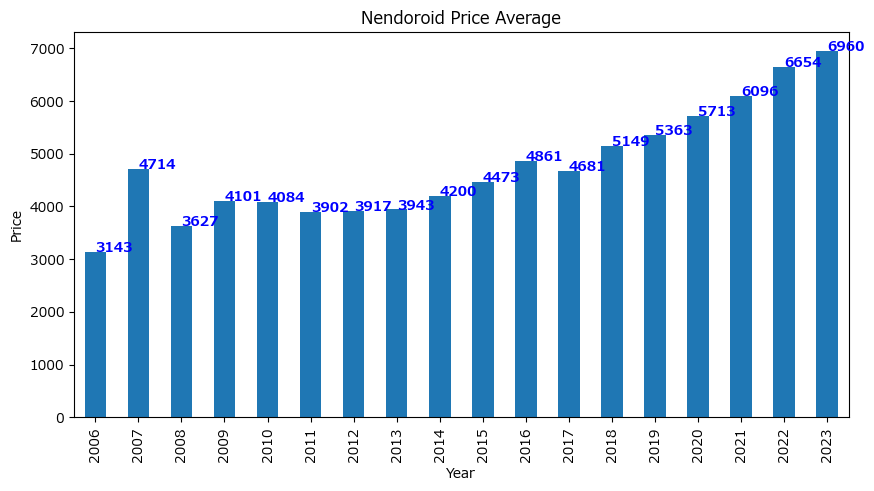

In [45]:
# 넨도로이드의 피규어만 추출
nendoroid_df = figure_price_df[figure_price_df['カテゴリー'] == 'ねんどろいど']

# 연도별 가격 평균 구하기
nendoroid_year_price_df = nendoroid_df.groupby('案内年')['価格'].mean()

# 그래프 그리기
nendoroid_year_price_df.plot.bar(figsize=(10, 5))

# 그래프에 숫자 추가
for i, v in enumerate(nendoroid_year_price_df.values):
    plt.text(i, v, str(int(v)), color='blue', fontweight='bold')

# 라벨 추가
plt.title('Nendoroid Price Average')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

넨도로이드의 가격은 꾸준히 증가하고 있었다. 정확히 얼마나 증가하고 감소했는지도 알아보자.

In [56]:
# 넨도로이드의 연도별 가격 평균의 실제 증감값 구하기
nendoroid_year_price_df.diff()


案内年
2006            NaN
2007    1571.000000
2008   -1086.792453
2009     474.136203
2010     -16.923750
2011    -181.625128
2012      14.511946
2013      26.322811
2014     256.496953
2015     273.450737
2016     387.728563
2017    -179.848518
2018     468.287080
2019     213.529528
2020     349.786228
2021     383.911630
2022     557.173279
2023     305.998430
Name: 価格, dtype: float64

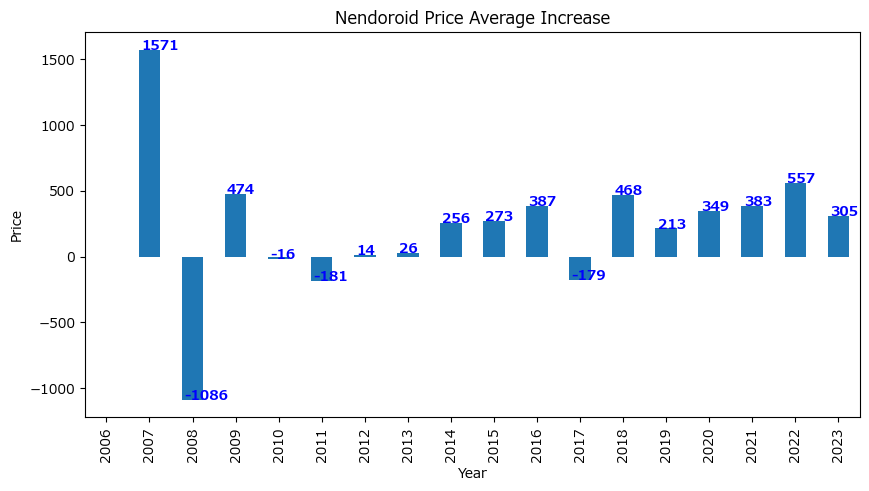

In [57]:
# 그래프 그리기
nendoroid_year_price_df.diff().plot.bar(figsize=(10, 5))

# 그래프에 숫자 추가, NaN 제외, 약간 오른쪽으로 이동
for i, v in enumerate(nendoroid_year_price_df.diff().values[1:]):
    plt.text(i + 0.8, v, str(int(v)), color='blue', fontweight='bold')

# 라벨 추가
plt.title('Nendoroid Price Average Increase')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()


2007년과 2008년은 상품수가 적은데다가 값이 높은 세트 상품도 있어 분석에 적합하지 않은 값이 나왔다.

2010~2013년도의 가격 변동이 거의 없는 해에는 일본 경제에 몇 가지 사건이 있었다.<br>
이에 피규어 가격의 변동이 거의 없지 않았을까 조심스레 추측해본다.
1. 엔고 (2010)
2. 동일본 대지진 (2011)
3. 아베노믹스 (2012)
4. 2010년대 디플레이션과 장기 저성장


2014년부터는 소비세가 5%에서 8%로 증가했다. 더불어 엔저 현상이 시작되어 피규어 가격이 소폭 상승했을 것이라 예상된다.


2018년에는 전년대비 가격이 눈에 띄게 증가했는데, 아베노믹스의 영향으로 물가 상승률이 높아짐과 더불어<br>
인력 부족으로 인건비 상승에 영향을 받았을 것이라 예상된다.

2020년도부터는 코로나 바이러스의 영향으로 인력 부족 & 물가 상승이 가속화 되고<br>
이에 더불어 2019년 10월부터 소비세가 8%에서 10%로 인상됨에 따라<br>
2022년에 가격 상승이 정점에 달했다고 예상된다.

2023년에는 2022년보다 비슷하거나 좀 더 높은 가격 상승률이 예상된다.

---

## 연도별 인기 시리즈 알아보기

이 데이터에는 정확한 작품명은 표기되어 있지만, 시리즈명에 해당하는 데이터는 존재하지 않는다.<br>
시리즈명(シリーズ名) 데이터 프레임을 추가하여, 정확한 인기 시리즈를 알아 보자. (수동 노가다...)<br>

In [11]:
# 作品名의 종류 출력하기
figure_df['作品名'].value_counts()

艦隊これくしょん ‐艦これ‐                168
Fate/Grand Order              167
キャラクター・ボーカル・シリーズ01 初音ミク       149
初音ミク GTプロジェクト                 118
刀剣乱舞-ONLINE-                   77
                             ... 
新ゲッターロボ                         1
秘密結社 鷹の爪                        1
figma 蝶野正洋 (ふぃぐま ちょうのまさひろ)      1
ヴァンパイアセイヴァー                     1
NIJISANJI EN                    1
Name: 作品名, Length: 2147, dtype: int64

In [12]:
# index와 value 모두 CSV 파일로 저장
figure_df['作品名'].value_counts().to_csv('figure_name.csv')

수동으로 편집한 CSV 파일을 읽어온다. 이름 부여 규칙은 다음과 같다.
- 각기 다른 이름을 가졌지만 같은 시리즈라면, 시리즈 이름을 붙였다.
- 작품명이 캐릭터명인 경우, 그 캐릭터를 대표하는 상표명을 기재했다.

In [80]:
# series.csv 읽어오기, 헤더 있음
series_df = pd.read_csv('series.csv')

In [81]:
series_df

,作品名,シリーズ名
0,艦隊これくしょん ‐艦これ‐,艦隊これくしょん ‐艦これ‐
1,Fate/Grand Order,Fate
2,キャラクター・ボーカル・シリーズ01 初音ミク,初音ミク
3,初音ミク GTプロジェクト,初音ミク
4,刀剣乱舞-ONLINE-,刀剣乱舞
...,...,...
2140,新ゲッターロボ,ゲッターロボ
2141,秘密結社 鷹の爪,秘密結社 鷹の爪
2142,figma 蝶野正洋 (ふぃぐま ちょうのまさひろ),figma
2143,ヴァンパイアセイヴァー,ヴァンパイアセイヴァー


In [82]:
# series_df['作品名']와 figure_df['作品名']이 같다면, figure_df['シリーズ名']에 series_df['シリーズ名']을 대입
for i in range(len(series_df)):
    figure_df.loc[figure_df['作品名'] == series_df.iloc[i]['作品名'], 'シリーズ名'] = series_df.iloc[i]['シリーズ名']

In [83]:
figure_df.head()

,案内年月,番号,画像,商品名,作品名,メーカー,カテゴリー,価格,発売時期,仕様,...,ヘッドパーツ以外の原型制作,初版・再販価格（単品）,デザイン原案,Designer,Illustrator,ザカールポージング監修,資料協力,案内年月日,案内年,シリーズ名
0,2006/01,000,https://images.goodsmile.info/cgm/images/produ...,ねんどろいど ネコアルク 「換装！ブーブー顔」編 (ねんどろいど ねこあるく 「かんそう！ぶ...,ネコアルク,グッドスマイルカンパニー,ねんどろいど,3143.0,2006/02,ABS＆PVC塗装済可動フィギュア・ノンスケール・ 全高：約110mm・専用台座付き,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-01-01,2006,月姫
1,2006/01,002,https://images.goodsmile.info/cgm/images/produ...,ねんどろいど へたれ セイバー限定Ver. (ねんどろいど へたれ せいばーげんていVer.),Fate/stay night,グッドスマイルカンパニー,ねんどろいど,3143.0,2006/07,ABS&PVC 塗装済み可動フィギュア・ノンスケール・全高：約100mm・換装用付替えパーツ付属,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-01-01,2006,Fate
2,2007/11,None,https://images.goodsmile.info/cgm/images/produ...,リボルテックダンボー アマゾンボックスバージョン (りぼるてっくだんぼー あまぞんぼっくすば...,よつばと！,海洋堂,REVOLTECH,2310.0,2007/12,ABS&PVC 塗装済み可動フィギュア・ノンスケール・全高：約130mm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-11-01,2007,よつばと！
3,2007/01,013,https://images.goodsmile.info/cgm/images/produ...,ねんどろいど へたれセイバーオルタ (ねんどろいど へたれせいばーおるた),Fate/stay night,グッドスマイルカンパニー,ねんどろいど,3143.0,2007/07,ABS&PVC 塗装済み可動フィギュア・ノンスケール・全高：約100mm・換装用付替えパーツ付属,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-01-01,2007,Fate
4,2007/01,006,https://images.goodsmile.info/cgm/images/produ...,ねんどろいど オウカちゃん空中装備完了Ver. (ねんどろいど おうかちゃんくうちゅうそうび...,ニトロウォーズ,グッドスマイルカンパニー,ねんどろいど,4190.0,2007/02,ABS&PVC 塗装済み可動フィギュア・ノンスケール・全高：約100mm・換装用付替えパーツ付属,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-01-01,2007,ニトロウォーズ


In [84]:
# figure_df['シリーズ名']의 간단 확인
figure_df['シリーズ名'].value_counts()

初音ミク                           342
Fate                           329
艦隊これくしょん ‐艦これ‐                 168
アイドルマスター                       129
Marvel                         125
                              ... 
Species（スピーシーズ 種の起源）             1
松風 Song of Sylvan                1
はじめてのギャル                         1
THE SHAOLIN COWBOY（少林カウボーイ）      1
HaneAme 雨波                       1
Name: シリーズ名, Length: 1466, dtype: int64

### NaN 데이터 정리

In [86]:
nan_values_in_annual_guide = figure_df['案内年'].isnull().sum()
nan_values_in_series_name = figure_df['シリーズ名'].isnull().sum()

print("NaN values in '案内年' 열:", nan_values_in_annual_guide)
print("NaN values in 'シリーズ名' 열:", nan_values_in_series_name)

NaN values in '案内年' 열: 0
NaN values in 'シリーズ名' 열: 0


In [87]:
figure_df[figure_df['シリーズ名'].isnull()]

,案内年月,番号,画像,商品名,作品名,メーカー,カテゴリー,価格,発売時期,仕様,...,ヘッドパーツ以外の原型制作,初版・再販価格（単品）,デザイン原案,Designer,Illustrator,ザカールポージング監修,資料協力,案内年月日,案内年,シリーズ名


In [88]:
# シリーズ名이 NaN인 행 삭제
figure_df = figure_df.dropna(subset=['シリーズ名'])

In [89]:
print(figure_df['シリーズ名'].value_counts())


初音ミク                           342
Fate                           329
艦隊これくしょん ‐艦これ‐                 168
アイドルマスター                       129
Marvel                         125
                              ... 
Species（スピーシーズ 種の起源）             1
松風 Song of Sylvan                1
はじめてのギャル                         1
THE SHAOLIN COWBOY（少林カウボーイ）      1
HaneAme 雨波                       1
Name: シリーズ名, Length: 1466, dtype: int64


### 연도별 그래프를 그리기 위한 함수 제작

In [91]:
# 연도별 시리즈명 통계 가로 그래프 top 10 함수
def series_name_top10(year):
    figure_df[figure_df['案内年'] == year]['シリーズ名'].value_counts().head(10).sort_values().plot.barh(figsize=(10, 5))

    # 그래프에 숫자 추가
    for i, v in enumerate(figure_df[figure_df['案内年'] == year]['シリーズ名'].value_counts().head(10).sort_values().values):
        plt.text(v, i, str(v), color='blue', fontweight='bold')

    # 라벨 추가
    plt.title(str(year) + ' Series Name Top 10')
    plt.xlabel('Count')
    plt.ylabel('Series Name')
    plt.show()

### 연도별 피규어 출시 현황으로 알아보는 오타쿠 역사

2006년, 굿스마일 컴퍼니의 시작은 타입문의 피규어(넨도로이드)였다.

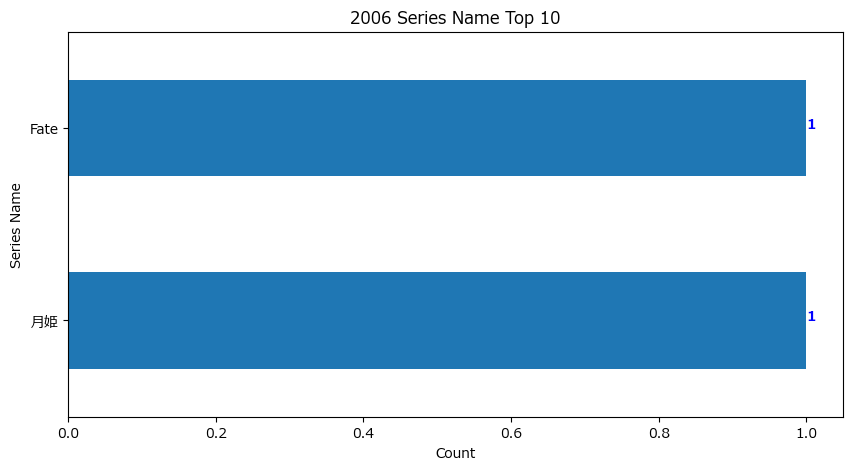

In [92]:
series_name_top10(2006)

2007년에는 니트로워즈, 스즈미야 하루히, 페이트, 요츠바랑! 피규어를 제작했다.<br>
이 때만 해도 피규어 수가 많지 않았다.

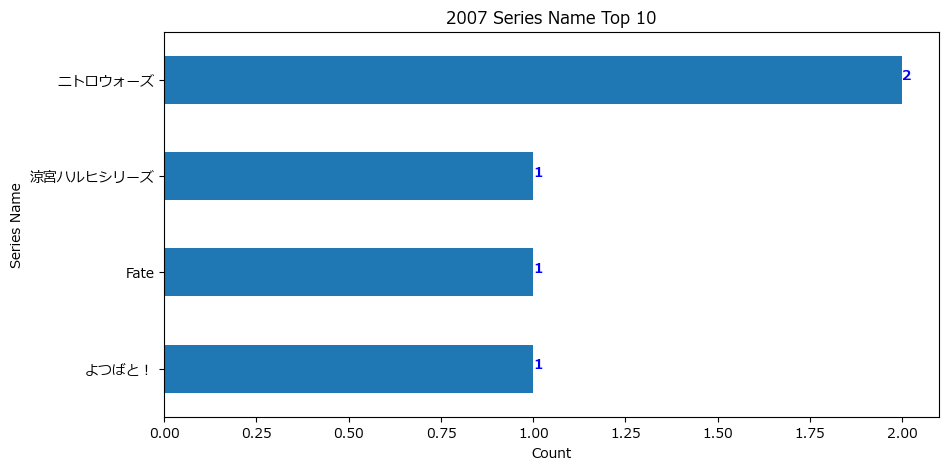

In [93]:
series_name_top10(2007)

### 2008: 하루히즘 신드롬의 시작
2006년 방영된 '스즈미야 하루히의 우울'이 일본에서 선풍적인 인기를 이끌며 관련 상품도 대거 출시되었다.<br>
이 그래프는 '출시연월'이 아닌 '안내연월'을 기준으로 하고 있다. 피규어 특성상 약간 뒤늦은 상품화가 이루어진다.<br>
그 뒤로는 페이트, 러키스타, 제네블럭, 스트리트 파이터, 아이돌 마스터가 뒤를 이었다.

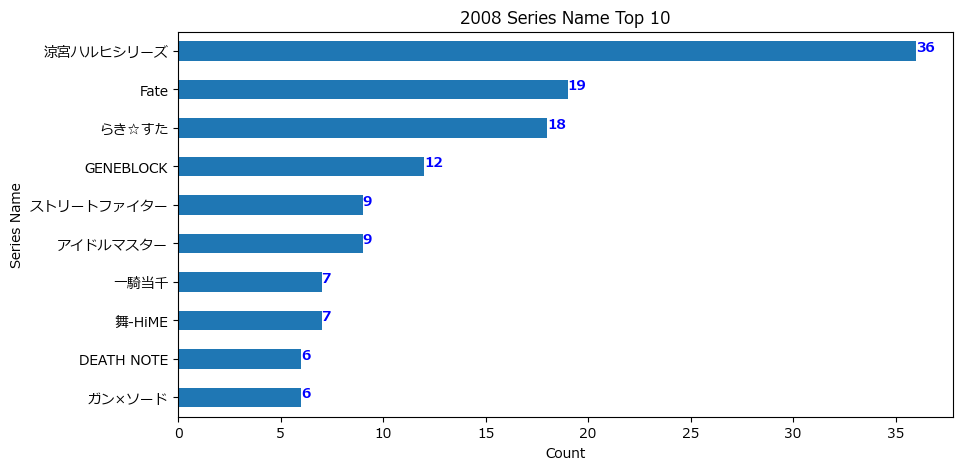

In [94]:
series_name_top10(2008)

### 2009: 나노하 전성기
마법소녀 리리컬 나노하의 뒤를 이어 2008년에 이은 러키스타, 우사비치, 하츠네 미쿠, 스즈미야 하루히 시리즈가 눈에 띈다.<br>
하츠네 미쿠의 Top 10 첫 등장 시점.

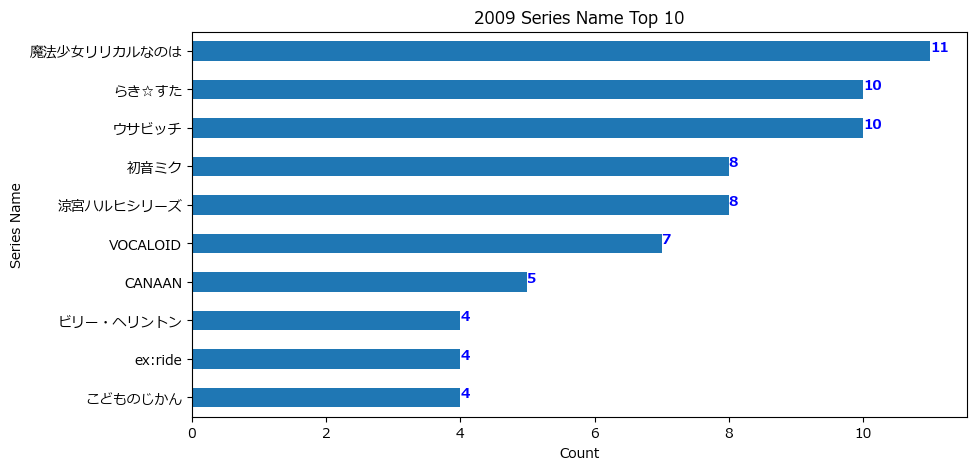

In [95]:
series_name_top10(2009)

### 2010: 케이온의 인기
나노하가 1위를 지키는 와중에, 신흥 강자인 케이온, 블랙 록 슈터, 동방 프로젝트가 등장한다.<br>
2008년 이후로 차트를 잠깐 벗어났었던 Fate의 재등장. 하츠네 미쿠의 인기도 여전하다.


**그 외 신작**
- 케이온: 신흥 강자 1
- 블랙 록 슈터: 신흥 강자 2
- 동방 프로젝트: 신흥 강자 3
- ex:ride: 중병장 + 여고생
- 럭키 독: BL 게임의 순위권 최초 등장
- 러브플러스

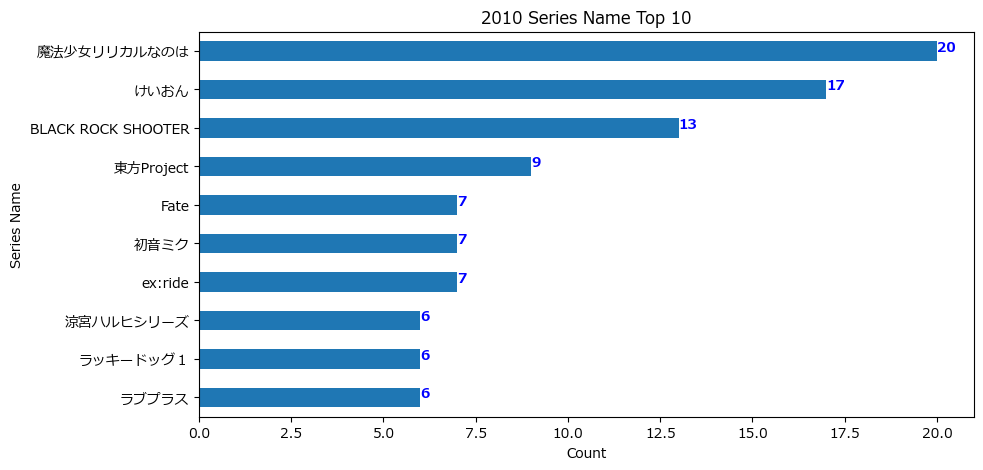

In [96]:
series_name_top10(2010)

### 2011: 모노가타리 시리즈와 하츠네 미쿠
2009~2010대에 열풍을 일으켰던 모노가타리 시리즈인 '바케모노가타리'가 1위를 차지했다.<br>
하츠네 미쿠, 케이온, 블랙 록 슈터, 동방 프로젝트, 페이트 시리즈는 여전히 순위를 지키고 있다.

**그 외 신작**
- 마법소녀 마도카 마기카
- 내 여동생이 이렇게 귀여울 리가 없어

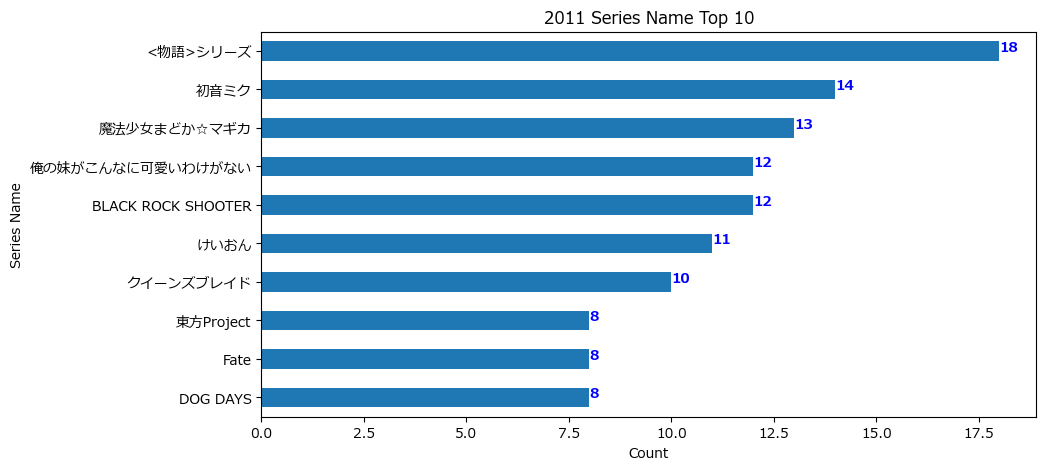

In [97]:
series_name_top10(2011)

### 2012: 마도카는 내가 지키겠어
마법소녀 마도가 마기카의 애니메이션 종영 후, 관련 상품이 대거 출시되었다. <br>
하츠네 미쿠와 페이트는 여전히 상위권을 지키고 있다.

**그 외 신작**
- 나는 친구가 적다
- 페르소나 시리즈(페르소나 4)
- 우서의 하루살이
- 노래의 왕자님

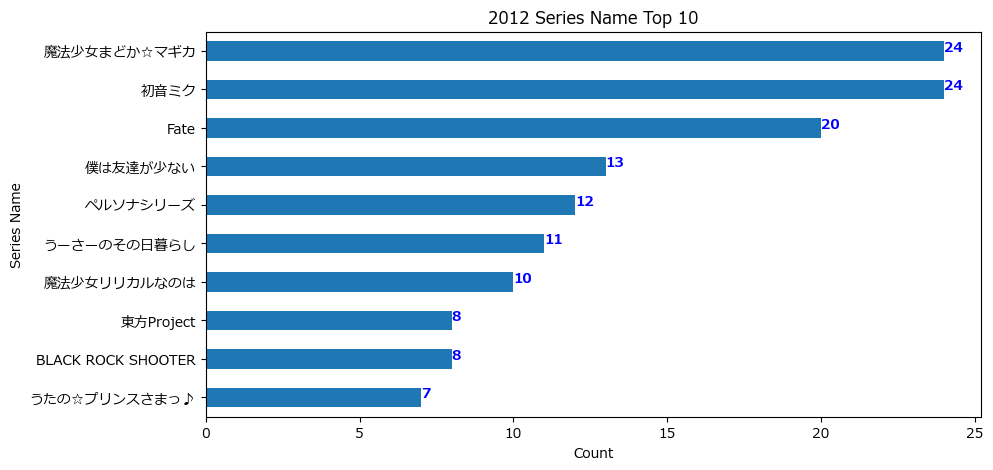

In [98]:
series_name_top10(2012)

### 2013: P와 함께 아이돌마스터
새롭게 자리잡은 신데렐라 걸즈와 기존의 밀리언 라이브가 시너지를 일으킨 한 해였다.<br>
그 뒤로는 소드아트 온라인, 슈타인즈 게이트, 카가미네 린렌(보컬로이드)가 상위권을 차지했다.<br>
하츠네 미쿠, 마법소녀 마도카 마기카, 페이트, 모노가타리 시리즈는 상위권을 지키는 중.

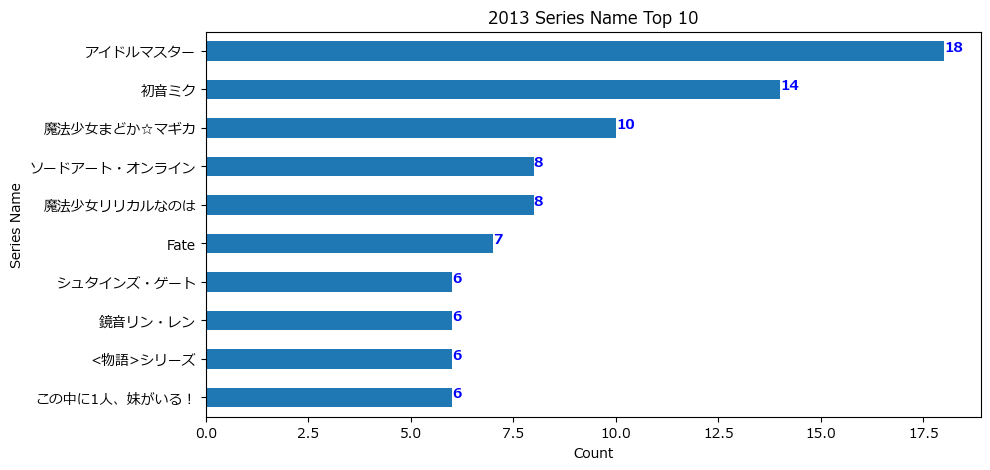

In [99]:
series_name_top10(2013)

### 2014: 함대 컬렉션, 서브컬처의 시작

무기물인 함대를 미소녀로 의인화한 게임이 인기를 끌었다. 지금까지의 1위의 수치과 비교가 안되는 46개의 상품 수를 자랑한다.

이 와중에 순위를 지키는 하츠네 미쿠가 대단해 보인다.<br>
아이돌마스터, 마법소녀 마도카 마기카, 모노가타리 시리즈는 순위를 지키고 있다.

**그 외 신작**
- 마블
- 인피니트 스트라토스
- 수퍼 소니코
- 진격의 거인

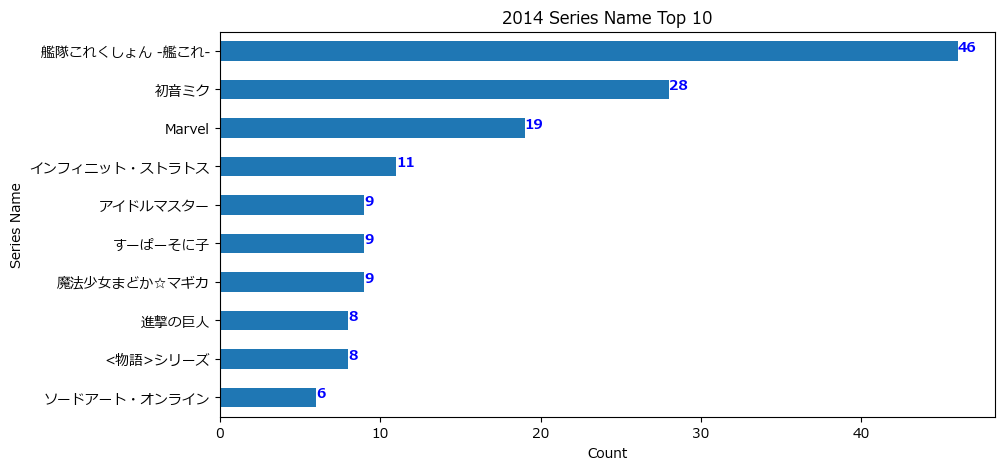

In [100]:
series_name_top10(2014)

### 2015: 러브라이브, 스쿨 아이돌의 시작
칸코레는 여전히 1위를 지키고 있고, 러브라이브와 아이돌마스터의 대립 구도가 눈에 띈다.<br>
실제로 당시 팬덤에서는 러브라이브 vs 아이돌마스터를 가지고 많이 다투었다.<br>

**그 외 신작**
- 도검난무: 첫 등장. 이 시점부터 여성향 상품이 많이 출시되었다.
- 프리파라
- 낙원추방
- 스트라이크 위치스

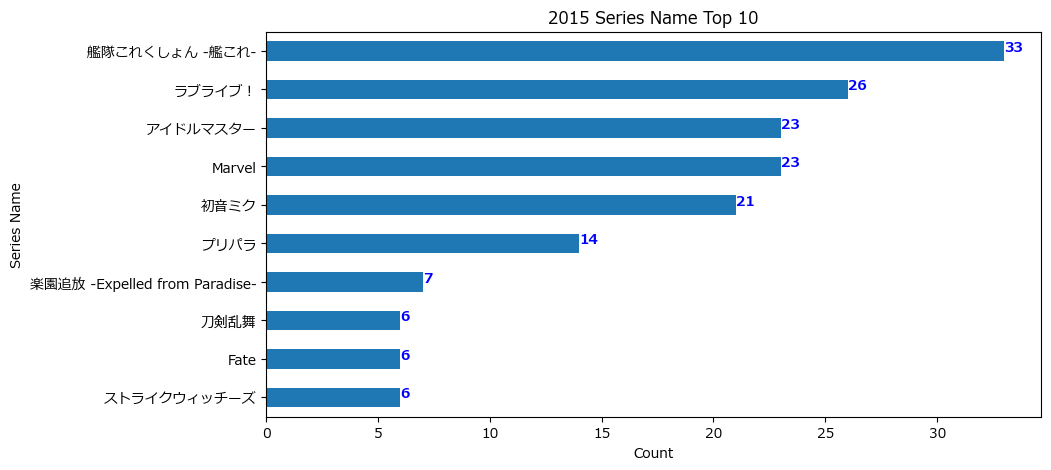

In [101]:
series_name_top10(2015)

### 2016: 식지 않는 칸코레의 인기
2014년부터 어마어마한 상품을 출시 중인 칸코레에 이어 아이돌마스터, 하츠네 미쿠, 도검난무가 순위를 기록했다.

**그 외 신작**
- 오소마츠상: 2015년에 리메이크 애니메이션이 제작되어 많은 인기를 누렸다.
- 걸즈 앤 판처: 극장판 개봉에 맞춰 관련 상품이 출시된 것으로 보인다.

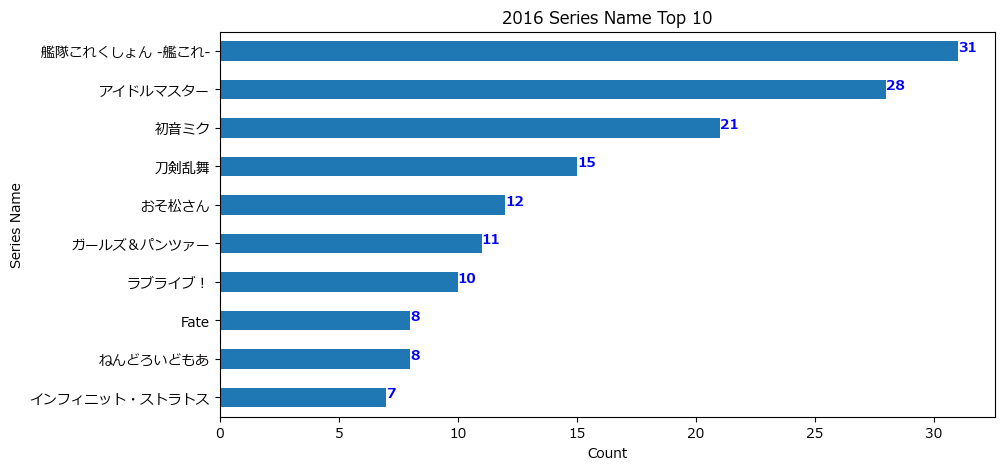

In [102]:
series_name_top10(2016)

### 2017: 페이트 전성기의 재림
2015년 출시된 페이트/그랜드 오더의 영향이 컸을 것이다. 등장 캐릭터가 많은 만큼, 많은 상품이 출시되었다.<br>
러브라이브는 2017년에 새롭게 '러브라이브 선샤인!'을 선보여 관련 상품도 대거 출시되었다.<br>

**그 외 신작**
- 시원찮은 그녀의 육성방법
- 포켓몬스터

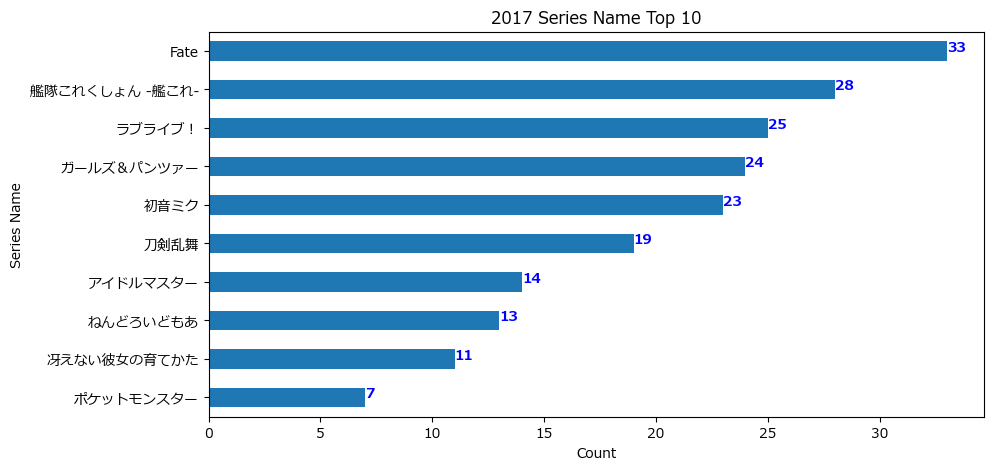

In [103]:
series_name_top10(2017)

### 2018: 선택과 집중
페이트 관련 상품의 개수는 늘고, 다른 상품의 개수가 눈에 띄게 줄었다.<br>
인건비 상승 등 경제의 영향을 받았으리라 생각된다.<br>
잘 팔리는 상품만 집중적으로 생산하는 전략을 취했을 것이라 짐작된다.

도검난무의 2015년부터 시작된 꾸준한 성장이 눈에 띈다.<br>
VTuber 카테고리가 눈에 띄는데, 당시 인기몰이 중이던 키즈나 아이에 빠르게 반응하여 관련 상품을 출시한 것으로 보인다.

**그 외 신작**
- 오버워치

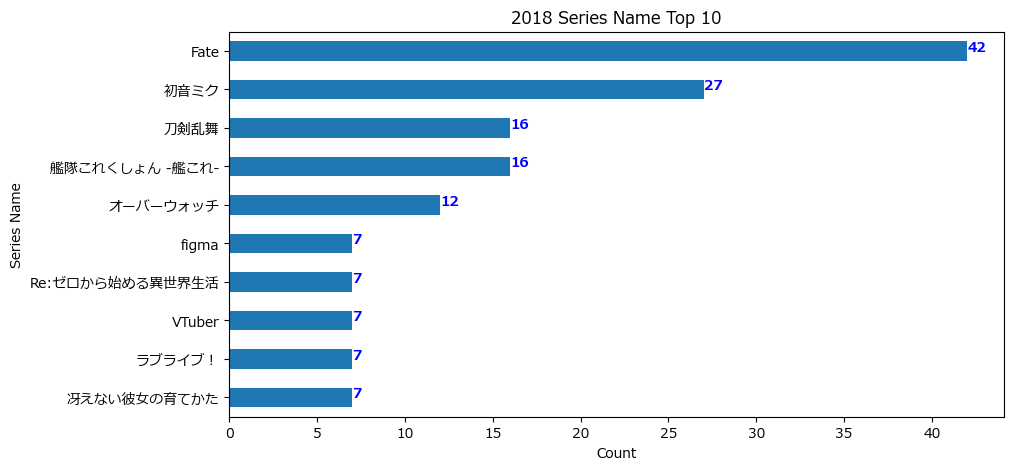

In [104]:
series_name_top10(2018)

### 2019: ???: 여기 페이트랑 미쿠만 만드나요?
페이트와 미쿠의 상품만 집중적으로 만드는 2018년의 성향이 계속 되고 있다.<br>
페이트와 미쿠의 인기가 여전하다는 것을 증명하고 있다.

**그 외 신작**
- SSSS.GRIDMAN
- 쿠로코의 농구
- 원펀맨

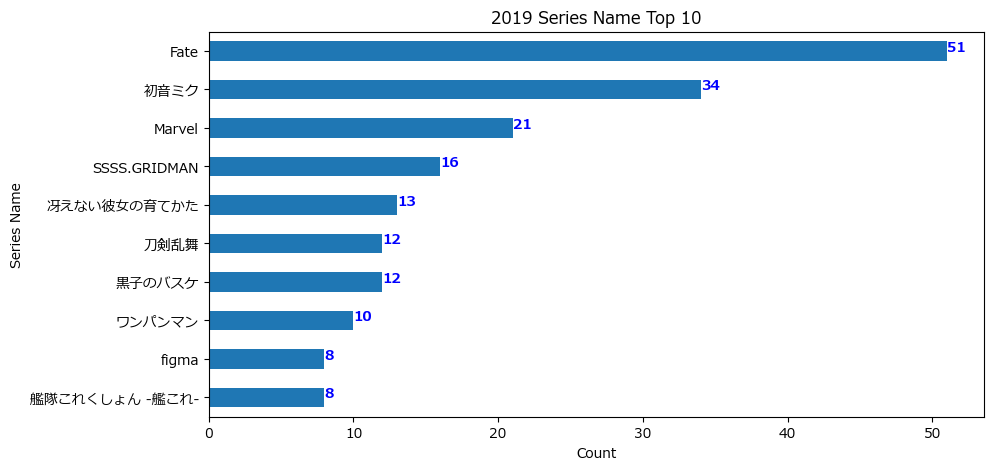

In [105]:
series_name_top10(2019)

### 2020: ???: 그러게요 만들다 보니 ㅎㅎ
2018년부터 계속된 전략, 잘 팔리는 상품을 많이 만들기.<br>
그 전략이 통했는지 이번에는 굿스마일 오리지널 상품인 치토세리움을 대량으로 생산했다.

**그 외 신작**
- Re:제로부터 시작하는 이세계 생활
- 나의 히어로 아카데미아
- 디즈니

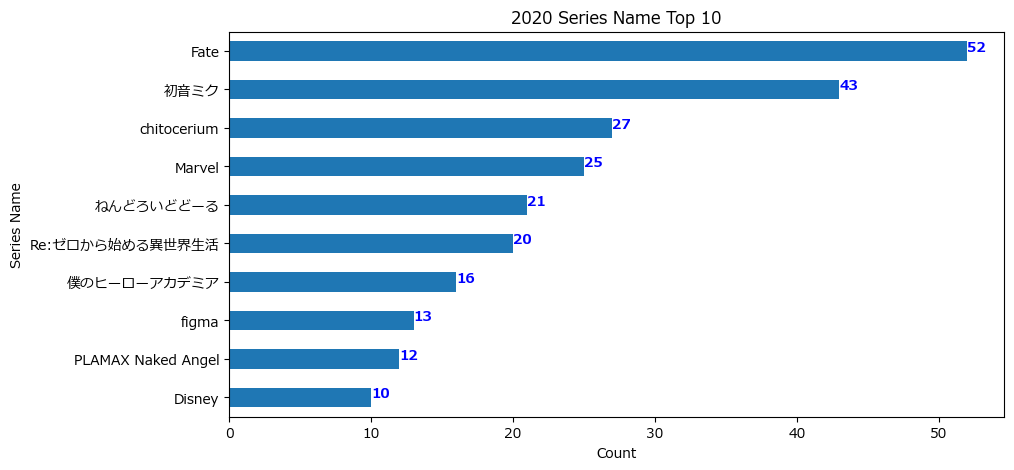

In [106]:
series_name_top10(2020)

### 2021: 귀멸의 칼날
페이트와 미쿠 상품은 여전히 대량으로 생산 중이고, 그중에 눈에 띄는 작품은 귀멸의 칼날이다.<br>
일본 전국을 강타했다고도 과언이 아닌 귀멸의 칼날이 피규어 업계에도 영향을 주었다.

**그 외 신작**

- 이 멋진 세계에 축복을
- 유루캠
- 러브라이브
- 아크나이츠(명일방주): 칸코레, 도검난무에 이어 3번째로 Top 10에 등장하는 작품이다.

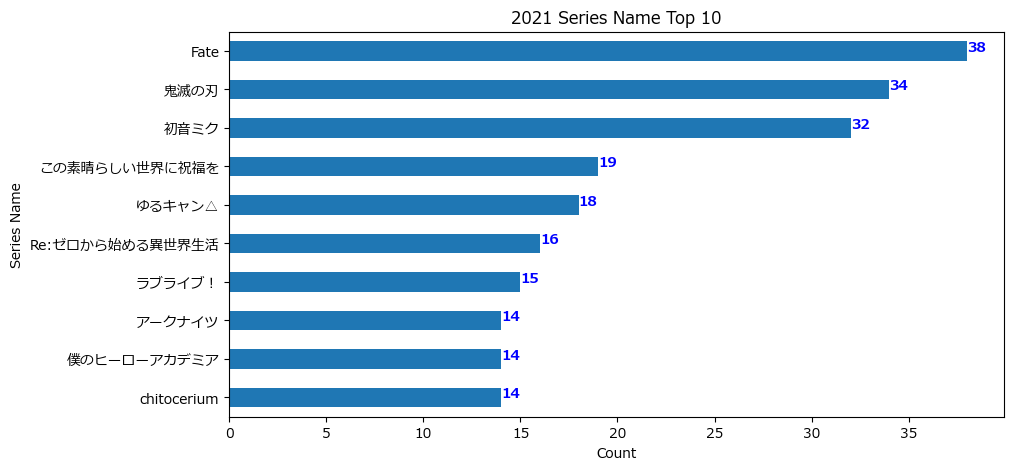

In [107]:
series_name_top10(2021)

### 2022: 떠오르는 샛별, 버튜버
2018년의 키즈나 아이의 뒤를 이어 또다시 버튜버 열풍이 불고 있다.

**그 외 신작**
- 주술회전
- 오등분의 신부
- 진격의 거인: 새롭게 시작하는 애니메이션의 영향
- 마크로스: 2021년 세계 전개의 영향으로 관련 상품이 출시
- 에반게리온: 신 극장판의 출시
- 동경 리벤저스
- 이 멋진 세계의 축복을

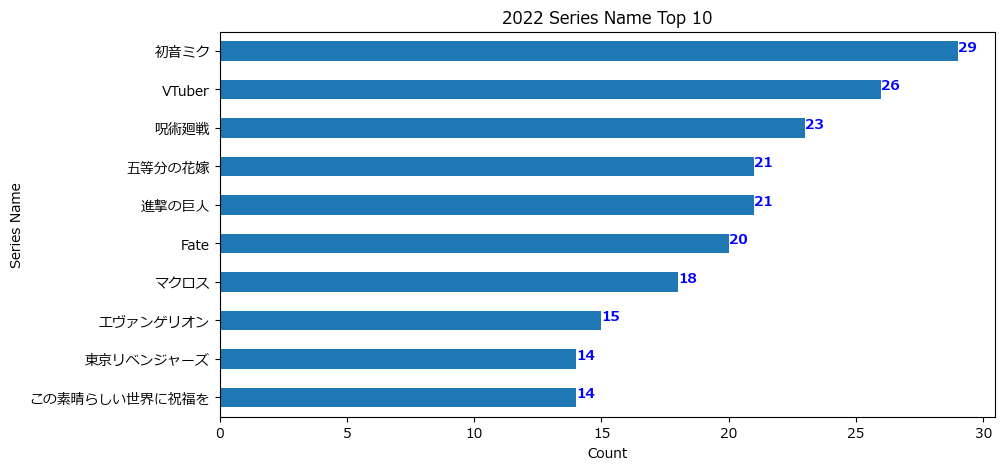

In [108]:
series_name_top10(2022)

### 2023: 너도 나도 버튜버
2022년도의 인터넷 방송을 한마디로 요약하면 버추얼의 폭풍이라 할 수 있겠다.<br>
그 말을 증명하듯 버튜버 관련 상품을 꾸준히 출시 중이다.

진격의 거인은 내용이 완결된 여운 때문인지 관련 상품을 계속 출시 중이고,<br>
미쿠와 페이트는 여전히 순위권을 지키고 있다.

**그 외 신작**
- 체인소맨
- 기동경찰 패트레이버

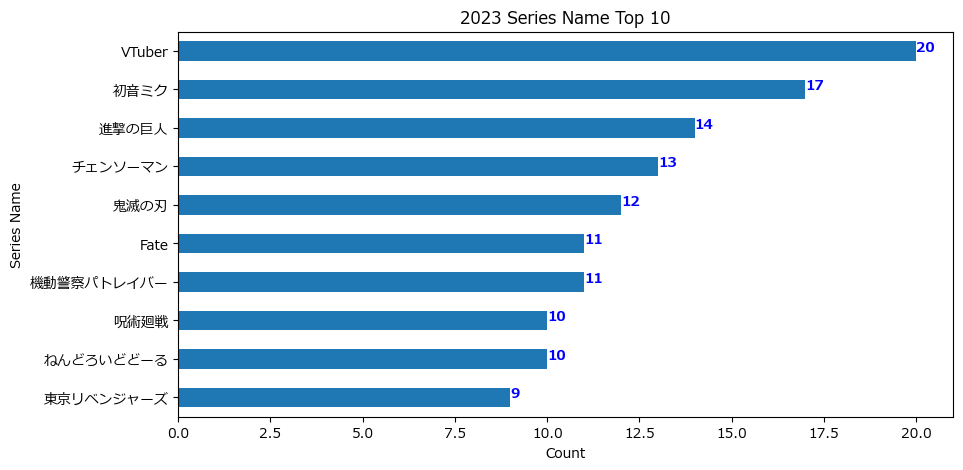

In [109]:
series_name_top10(2023)

## 결론

오타쿠 시장에 기민하게 반응하는 굿스마일 컴퍼니의 상품화 목록으로 약 17년의 피규어와 오타쿠 역사를 분석해 봤다.<br>
시대의 흐름에 따라 인기 작품은 달라지지만, '페이트'와 '하츠네 미쿠'는 10년 이상 Top 10의 자리를 지켜온 것을 볼 수 있다.

만약 좋은 협업 상대를 찾고 있다면 '하츠네 미쿠'와 '페이트'를 선택하는 것도 좋을 것이다.